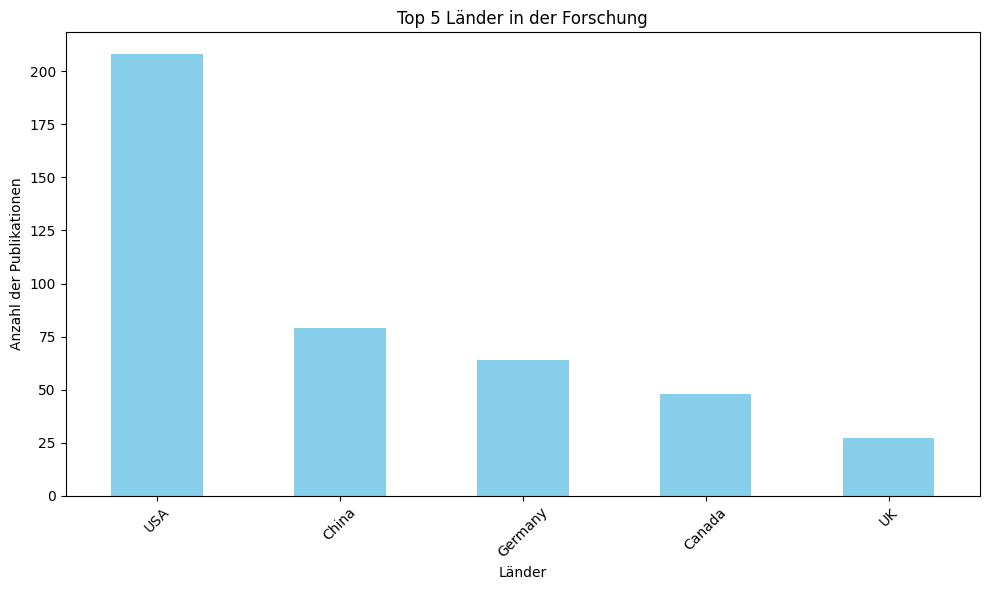

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Den Pfad zur CSV-Datei definieren (angenommen, sie liegt im 'data'-Ordner deines Projekts)
csv_file_path = os.path.join(os.getcwd(), '..', 'Data', 'test_dataset.csv')

# CSV-Datei einlesen
df = pd.read_csv(csv_file_path)

# Welche 5 Länder sind Spitzenreiter in der Forschung?

# Extrahieren der Länder aus den Affiliations
df['Country'] = df['Author Affiliations'].dropna().apply(lambda x: x.split(',')[-1].strip())

# Die häufigsten 5 Länder identifizieren
top_countries = df['Country'].value_counts().head(5)

# Ausgabe der Top 5 Länder als Bar-Chart
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Länder in der Forschung')
plt.ylabel('Anzahl der Publikationen')
plt.xlabel('Länder')
plt.xticks(rotation=45)
plt.tight_layout()

# Grafik anzeigen
plt.show()
